# **Attribute Information**
---

### **Columns:**
> **ID:** Unique identifier for the Customer.

> **Age:** Age of the Customer.

> **Gender:** Gender of the Customer.

>  **Driving_License:** 0 for customer not having DL, 1 for customer having DL.

> **Region_Code:** Unique code for the region of the customer.

> **Previously_Insured:** 0 for customer not having vehicle insurance, 1 for customer having vehicle insurance.

> **Vehicle_Age:** Age of the vehicle.

> **Vehicle_Damage:** Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

> **Annual_Premium:** The amount customer needs to pay as premium in the year.

> **Policy_Sales_Channel:** Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

> **Vintage:** Number of Days, Customer has been associated with the company.

> **Response (Dependent Feature):** 1 for Customer is interested, 0 for Customer is not interested.

*Let's deep dive into the dataset,*

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


### Load the Dataset

In [2]:
# Load the anonymized dataset and see the first rows
da = pd.read_csv('C:\\Users\\USER-PC\\Desktop\\ThesisCode\\Data\\Anonymized\\aug_train_anonymized.csv')
da.head()

,id,Gender,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age_Group
0,a7c4f22e-2a52-4bbf-a626-56cf89dc6442,Male,1,7.0,1,< 1 Year,No,2630.0,152.0,16,0,YoungAge
1,9c22009d-9689-4f84-be03-18d1ae42366a,Male,1,28.0,0,1-2 Year,Yes,43327.0,26.0,135,0,MiddleAge
2,40742092-53aa-4c91-a00d-af595c481ff9,Female,1,33.0,0,1-2 Year,Yes,35841.0,124.0,253,0,OldAge
3,f528148a-e41c-483a-b450-a2fbf440b110,Female,1,33.0,0,< 1 Year,No,27645.0,152.0,69,0,YoungAge
4,f6c1f656-21d8-49e0-9366-ac664649710d,Male,1,46.0,1,< 1 Year,No,29023.0,152.0,211,0,YoungAge


# **Data Wrangling**


---


- Data wrangling is the process of cleaning and unifying messy and complex data sets for easy access and analysis.

- This process typically includes manually converting and mapping data from one raw form into another format to allow for more convenient consumption and organization of the data.

*Let's dive into the dataset!*

### Dataset Rows_Columns count

In [3]:
# Dataset Rows & Columns count
print ('the number of rows and columns:',da.shape)

the number of rows and columns: (382154, 12)


### Dataset overview

In [4]:
# Dataset Details
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382154 entries, 0 to 382153
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    382154 non-null  object 
 1   Gender                382154 non-null  object 
 2   Driving_License       382154 non-null  int64  
 3   Region_Code           382154 non-null  float64
 4   Previously_Insured    382154 non-null  int64  
 5   Vehicle_Age           382154 non-null  object 
 6   Vehicle_Damage        382154 non-null  object 
 7   Annual_Premium        382154 non-null  float64
 8   Policy_Sales_Channel  382154 non-null  float64
 9   Vintage               382154 non-null  int64  
 10  Response              382154 non-null  int64  
 11  Age_Group             382154 non-null  object 
dtypes: float64(3), int64(4), object(5)
memory usage: 35.0+ MB


In [5]:
da.describe()

,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000
mean,0.998108,26.406867,0.489182,30711.271362,111.939812,154.189429,0.163811
std,0.043455,13.181241,0.499884,17061.595532,54.286511,83.735107,0.370104
min,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,1.000000,15.000000,0.000000,24546.000000,26.000000,81.000000,0.000000
50%,1.000000,28.000000,0.000000,31692.000000,145.000000,154.000000,0.000000
75%,1.000000,35.000000,1.000000,39447.750000,152.000000,227.000000,0.000000
max,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


### Data set verification


Check Unique Values for each variable

In [6]:
# Check Unique Values for each variable.
da.nunique()

id                      382154
Gender                       2
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48993
Policy_Sales_Channel       156
Vintage                    290
Response                     2
Age_Group                    3
dtype: int64

Duplicate values

In [7]:
# Find categorical variables
categorical = [var for var in da.columns if da[var].dtype == 'O']
print('There are {} categorical variables: {}'.format(len(categorical), ', '.join(categorical)))

# Find numerical variables
numerical = [var for var in da.columns if da[var].dtype != 'O']
print('There are {} numerical variables: {}'.format(len(numerical), ', '.join(numerical)))

There are 5 categorical variables: id, Gender, Vehicle_Age, Vehicle_Damage, Age_Group
There are 7 numerical variables: Driving_License, Region_Code, Previously_Insured, Annual_Premium, Policy_Sales_Channel, Vintage, Response


In [8]:
# Dataset Duplicate Value Count
len(da[da.duplicated()])

0

Our dataset has no duplicates.

#### Zero/missing values

In [9]:
# Missing Values/Null Values Count
miss_values = da.isna().sum()
miss_values

id                      0
Gender                  0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
Age_Group               0
dtype: int64

There are no missing values/Null values.

### **Observations:**
---
- As we can see, our data set contains  382154 rows and 12 columns.
- We do not have any **Null Values** in our dataset.
- We have 7 numeric and 5 categorical independent features.
- Our dependent feature is a categorical column (*Response*)

## **Data Cleaning and Refactoring**
---
Let's reformat and clean the data for smooth processing!

### **Finding Outliers**
---
*Let's take a look at the outliers (if any) in our dataset.*

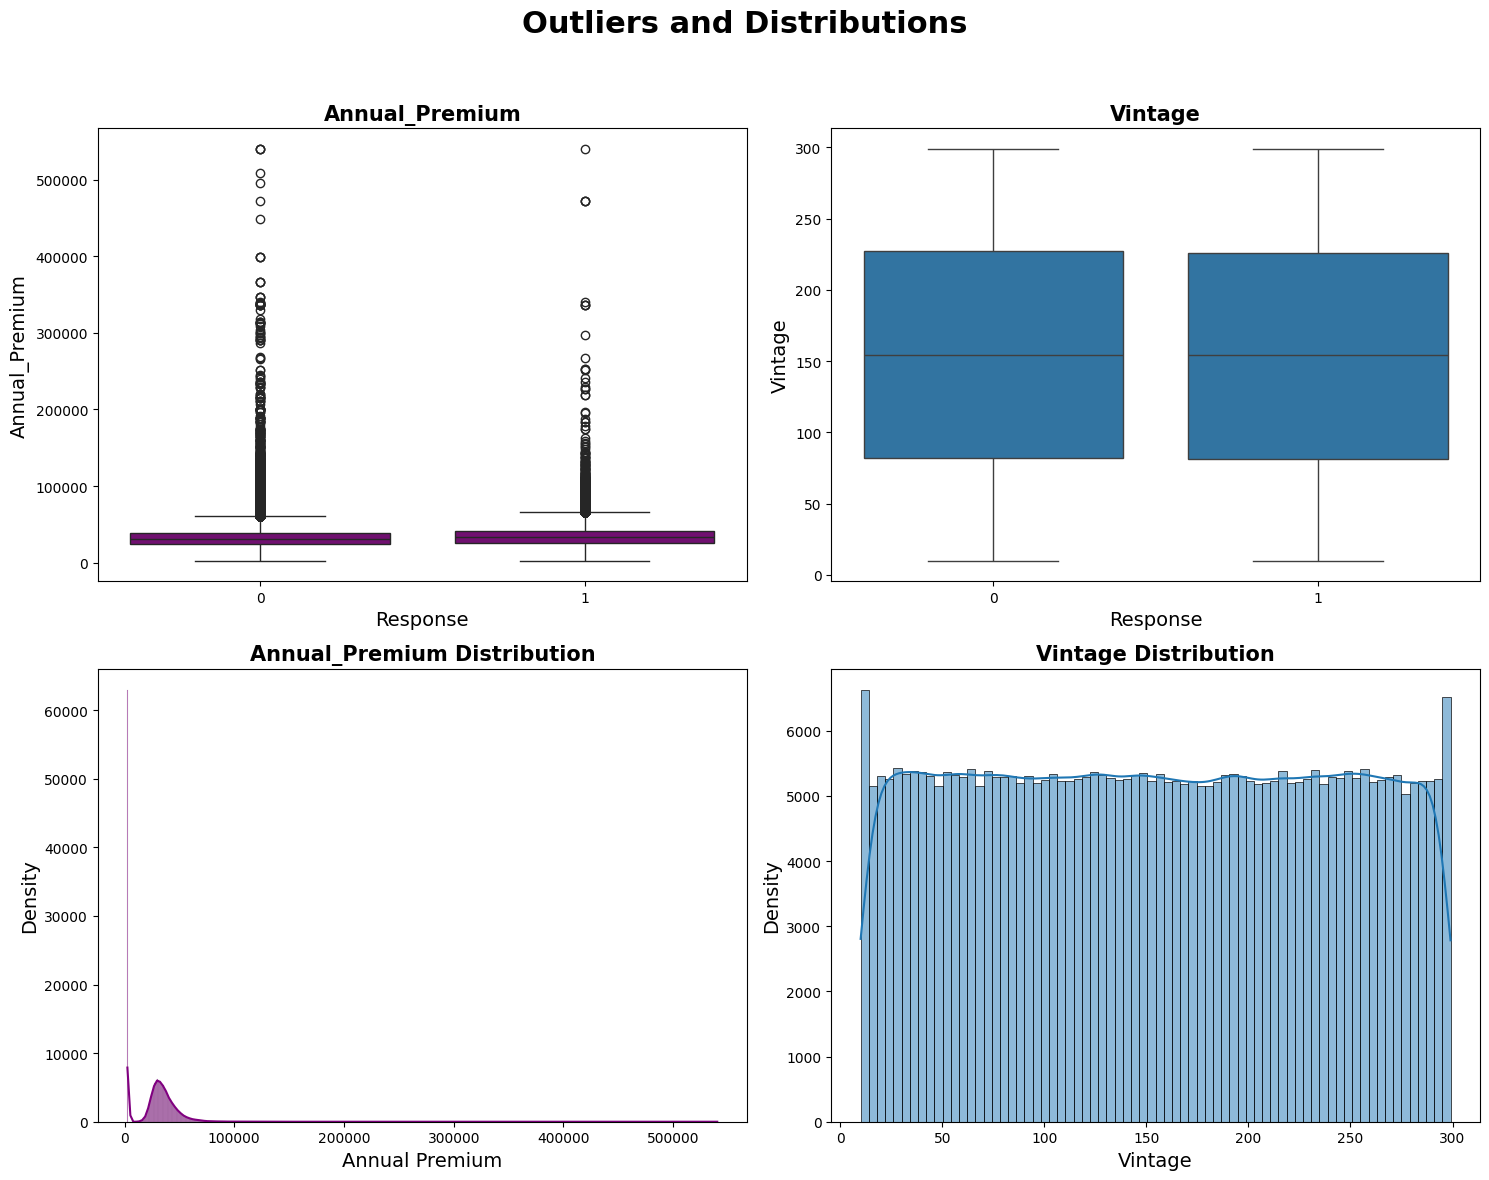

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

def show_outliers(df):
    # Setup the figure and axes
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))  # Adjusted grid to 2x2

    # Plotting boxplots for Annual_Premium and Vintage against Response
    sns.boxplot(ax=axes[0, 0], y='Annual_Premium', x='Response', data=df,color="purple")
    axes[0, 0].set_xlabel('Response', fontdict={'fontsize': 14})
    axes[0, 0].set_ylabel('Annual_Premium', fontdict={'fontsize': 14})
    axes[0, 0].set_title('Annual_Premium', fontdict={'fontsize': 15, 'fontweight': 'bold'})

    sns.boxplot(ax=axes[0, 1], y='Vintage', x='Response', data=df)
    axes[0, 1].set_xlabel('Response', fontdict={'fontsize': 14})
    axes[0, 1].set_ylabel('Vintage', fontdict={'fontsize': 14})
    axes[0, 1].set_title('Vintage', fontdict={'fontsize': 15, 'fontweight': 'bold'})

    # Plotting distributions for Annual_Premium and Vintage
    sns.histplot(ax=axes[1, 0], x=df['Annual_Premium'], color="purple", kde=True)
    axes[1, 0].set_xlabel('Annual Premium', fontdict={'fontsize': 14})
    axes[1, 0].set_ylabel('Density', fontdict={'fontsize': 14})
    axes[1, 0].set_title('Annual_Premium Distribution', fontdict={'fontsize': 15, 'fontweight': 'bold'})

    sns.histplot(ax=axes[1, 1], x=df['Vintage'], kde=True)
    axes[1, 1].set_xlabel('Vintage', fontdict={'fontsize': 14})
    axes[1, 1].set_ylabel('Density', fontdict={'fontsize': 14})
    axes[1, 1].set_title('Vintage Distribution', fontdict={'fontsize': 15, 'fontweight': 'bold'})

    # Overall title
    plt.suptitle('Outliers and Distributions', fontsize=22, fontweight='bold')

    # Adjust layout
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the suptitle

# Assuming 'da' is your DataFrame
show_outliers(da)


*   From the above plot it can be implied that **Annual Premium** has a poitively skewed distribution.
*   From above we can also depict that **Vintage** has a approximatly uniform distribution.

## Outlier Treatment 


---

*   For Outlier treatment we will be applying quantile method.


In [11]:
# Miscellaneous
import time
from sklearn.preprocessing import MinMaxScaler
def outlier_treatment(df):
    Q1=df['Annual_Premium'].quantile(0.25)
    Q3=df['Annual_Premium'].quantile(0.75)
    IQR=Q3-Q1

    Lower_Whisker = Q1-1.5*IQR
    Upper_Whisker = Q3+1.5*IQR
    df['Annual_Premium_Treated'] = np.where(df['Annual_Premium']>Upper_Whisker, Upper_Whisker, df['Annual_Premium'])

def scale_features(df):
    scaler = MinMaxScaler()

    df['Annual_Premium_Treated'] = scaler.fit_transform(df['Annual_Premium_Treated'].values.reshape(-1,1))
    df['Vintage_Treated'] = scaler.fit_transform(df['Vintage'].values.reshape(-1,1))

outlier_treatment(da)
#scale_features(da)

C:\Users\USER-PC\AppData\Local\Temp\ipykernel_11668\867684749.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ax = axes[1], x = df['Annual_Premium_Treated'], color='brown')


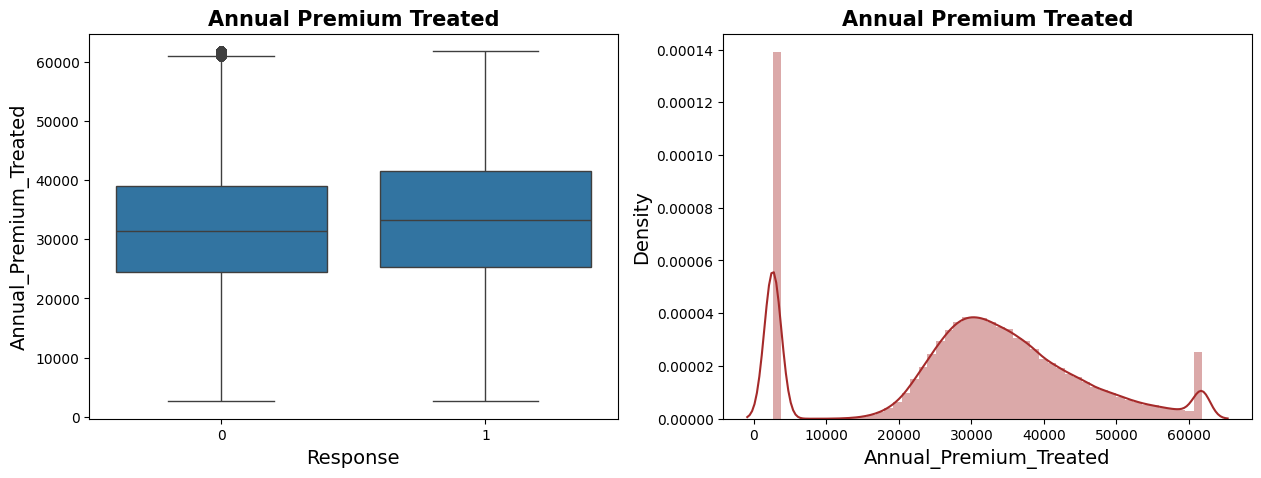

In [12]:
def show_ann_prem_outliers(df):

    fig, axes = plt.subplots(1, 2, figsize=(15,5))
    sns.boxplot(ax = axes[0], y = 'Annual_Premium_Treated',x = 'Response', data = df)
    axes[0].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[0].set_ylabel(ylabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[0].set_title('Annual Premium Treated', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.distplot(ax = axes[1], x = df['Annual_Premium_Treated'], color='brown')
    axes[1].set_xlabel(xlabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[1].set_ylabel(ylabel = 'Density', fontdict={'fontsize': 14})
    axes[1].set_title('Annual Premium Treated', fontdict={'fontsize': 15,  'fontweight' :'bold'})


show_ann_prem_outliers(da)

*   From the above plots we can see that there are no more outliers in *Annual Premium*.

In [13]:
# Write your code to make your dataset analysis ready.
df_desc = []
for column in da.columns:
  df_desc.append([column,
                  da[column].dtypes,
                  da[column].isnull().sum(),
                  round(da[column].isnull().sum()/len(da)*100, 2),
                  da[column].nunique(),
                  da[column].unique()])

## storing all the information in a single table just to keep it neat 
column_desc = pd.DataFrame(df_desc, columns = ['Column', 'Dtype', 'Null', 'Null (%)', 'nUnique', 'Unique'])
column_desc

,Column,Dtype,Null,Null (%),nUnique,Unique
0,id,object,0,0.0,382154,"[a7c4f22e-2a52-4bbf-a626-56cf89dc6442, 9c22009..."
1,Gender,object,0,0.0,2,"[Male, Female]"
2,Driving_License,int64,0,0.0,2,"[1, 0]"
3,Region_Code,float64,0,0.0,53,"[7.0, 28.0, 33.0, 46.0, 25.0, 8.0, 41.0, 39.0,..."
4,Previously_Insured,int64,0,0.0,2,"[1, 0]"
5,Vehicle_Age,object,0,0.0,3,"[< 1 Year, 1-2 Year, > 2 Years]"
6,Vehicle_Damage,object,0,0.0,2,"[No, Yes]"
7,Annual_Premium,float64,0,0.0,48993,"[2630.0, 43327.0, 35841.0, 27645.0, 29023.0, 2..."
8,Policy_Sales_Channel,float64,0,0.0,156,"[152.0, 26.0, 124.0, 122.0, 158.0, 157.0, 156...."
9,Vintage,int64,0,0.0,290,"[16, 135, 253, 69, 211, 23, 209, 51, 262, 217,..."


In [14]:
# Drop the 'Annual_Premium' column from the DataFrame
da.drop('Annual_Premium', axis=1, inplace=True)

# Find indices of rows to drop (those without a driving license or under 18)
indices_to_drop = da[(da['Driving_License'] == 0)].index

# Drop these rows using the indices
df_dropped = da.drop(indices_to_drop)
print(da.count())
print("After deleting clients who they don't have Driving_license")
# Display the DataFrame to verify rows are dropped
print(df_dropped.count())


id                        382154
Gender                    382154
Driving_License           382154
Region_Code               382154
Previously_Insured        382154
Vehicle_Age               382154
Vehicle_Damage            382154
Policy_Sales_Channel      382154
Vintage                   382154
Response                  382154
Age_Group                 382154
Annual_Premium_Treated    382154
dtype: int64
After deleting clients who they don't have Driving_license
id                        381431
Gender                    381431
Driving_License           381431
Region_Code               381431
Previously_Insured        381431
Vehicle_Age               381431
Vehicle_Damage            381431
Policy_Sales_Channel      381431
Vintage                   381431
Response                  381431
Age_Group                 381431
Annual_Premium_Treated    381431
dtype: int64


In [15]:
df_dropped.to_csv('C:\\Users\\USER-PC\\Desktop\\ThesisCode\\Data\\Anonymized\\aug_train_anonymized.csv', index=False)
print("Data cleaning is done")
df_dropped.head()

Data cleaning is done


,id,Gender,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Vintage,Response,Age_Group,Annual_Premium_Treated
0,a7c4f22e-2a52-4bbf-a626-56cf89dc6442,Male,1,7.0,1,< 1 Year,No,152.0,16,0,YoungAge,2630.0
1,9c22009d-9689-4f84-be03-18d1ae42366a,Male,1,28.0,0,1-2 Year,Yes,26.0,135,0,MiddleAge,43327.0
2,40742092-53aa-4c91-a00d-af595c481ff9,Female,1,33.0,0,1-2 Year,Yes,124.0,253,0,OldAge,35841.0
3,f528148a-e41c-483a-b450-a2fbf440b110,Female,1,33.0,0,< 1 Year,No,152.0,69,0,YoungAge,27645.0
4,f6c1f656-21d8-49e0-9366-ac664649710d,Male,1,46.0,1,< 1 Year,No,152.0,211,0,YoungAge,29023.0


My dataset is in excellent condition; it's free from redundant  values, duplicates, missing values, and outliers. This sets a solid foundation for us to proceed to the analysis phase confidently.

In [16]:
# Check the count of customers with Driving_License equal to 0
no_license_count = df_dropped[df_dropped['Driving_License'] == 0].shape[0]

# Print the number of customers without a driving license
print(f"Number of customers without a driving license: {no_license_count}")

# If you want to see the actual records of customers without a driving license, you can do:
if no_license_count > 0:
    print("Showing customers without a driving license:")
    display(df_dropped[df_dropped['Driving_License'] == 0])  # Using display() for nicer formatting in Jupyter Notebook
else:
    print("No customers without a driving license found.")

Number of customers without a driving license: 0
No customers without a driving license found.
